In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

In [14]:
df_usd_euro = pd.read_csv('data_usd.csv', skiprows=4)
df_usd_euro.dropna(inplace=True)

In [17]:
df_usd_euro.columns

Index(['date', '[US dollar ]'], dtype='object')

- renaming columns

In [18]:
df_usd_euro.rename(columns={'Period\\Unit:': 'date', '[US dollar ]': 'USD'}, inplace=True)


In [19]:
df_usd_euro

,date,USD
0,2023-09-01,1.0844
1,2023-08-31,1.0868
2,2023-08-30,1.0886
3,2023-08-29,1.0803
4,2023-08-28,1.0808
...,...,...
6376,1999-01-08,1.1659
6377,1999-01-07,1.1632
6378,1999-01-06,1.1743
6379,1999-01-05,1.1790


In [20]:
df_usd_euro.dtypes

date    object
USD     object
dtype: object

In [21]:
#casting 'date' to a datetime data type
date = pd.to_datetime(df_usd_euro['date'])
df_usd_euro['date'] = date
df_usd_euro.head()

,date,USD
0,2023-09-01,1.0844
1,2023-08-31,1.0868
2,2023-08-30,1.0886
3,2023-08-29,1.0803
4,2023-08-28,1.0808


In [22]:
#casting 'date' to float
df_usd_euro['USD'] = pd.to_numeric(df_usd_euro['USD'], errors='coerce')


In [23]:
df_usd_euro.dtypes

date    datetime64[ns]
USD            float64
dtype: object

In [24]:
#filter it to show only data from 2018 onwards
df_usd_euro['date'] = pd.to_datetime(df_usd_euro['date'])
df_usd_euro = df_usd_euro[df_usd_euro['date'] >= '2018-01-01']
df_usd_euro

,date,USD
0,2023-09-01,1.0844
1,2023-08-31,1.0868
2,2023-08-30,1.0886
3,2023-08-29,1.0803
4,2023-08-28,1.0808
...,...,...
1449,2018-01-08,1.1973
1450,2018-01-05,1.2045
1451,2018-01-04,1.2065
1452,2018-01-03,1.2023


Calculating the highest and the lowest depriciation against euro (the highest and the lowest historical value in the dataset)

<Axes: xlabel='date'>

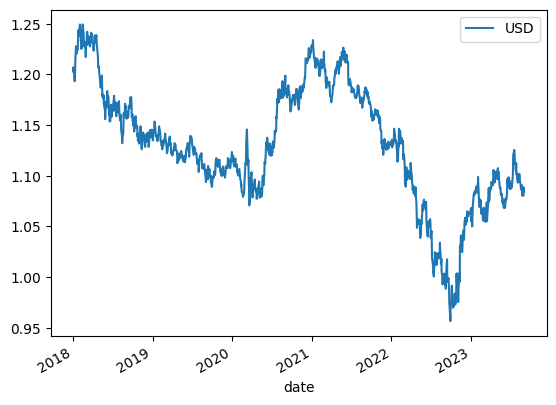

In [25]:
df_usd_euro.plot(x='date', y=['USD'])

Max val of 1.249 at date 1421
Min val of 0.957 at date 238


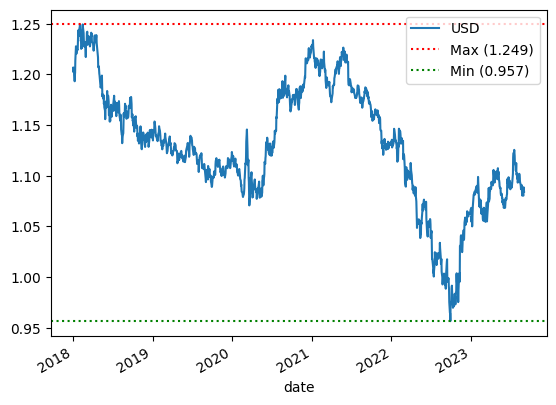

In [28]:
# Plot the DataFrame
ax = df_usd_euro.plot(x='date', y=['USD'])

# Calculate maximum and minimum values and their indices
max_val = df_usd_euro['USD'].max()
max_idx = df_usd_euro['USD'].idxmax()
min_val = df_usd_euro['USD'].min()
min_idx = df_usd_euro['USD'].idxmin()

# Print the results
print(f"Max val of {max_val:.3f} at date {max_idx}")
print(f"Min val of {min_val:.3f} at date {min_idx}")

# Add dotted lines for maximum and minimum values
ax.axhline(max_val, color='red', linestyle='dotted', label=f'Max ({max_val:.3f})')
ax.axhline(min_val, color='green', linestyle='dotted', label=f'Min ({min_val:.3f})')

# Show the legend
ax.legend()

# Show the plot
plt.show()

- See the difference between 2 days in order to determine the highest appreciation and depreciation against Euro in one day
- first create a copy of the dataframe, otherwise i will get warnings that pandas is attempting to modify a copy of the DataFrame rather than the original DataFrame

In [36]:
df_usd_euro['USD']
df_usd_euro_2 = df_usd_euro.copy()

<Axes: >

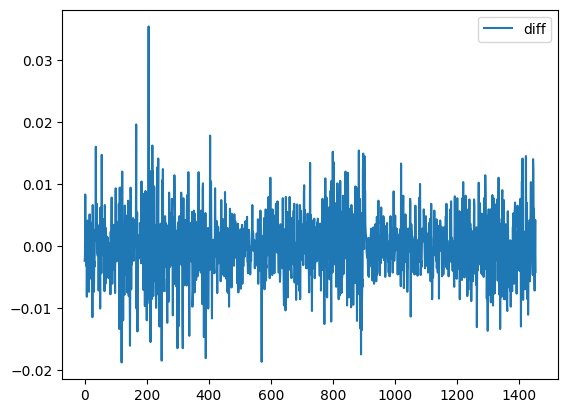

In [37]:
df_usd_euro_2['diff'] = df_usd_euro_2['USD'].diff(-1)
df_usd_euro_2.plot(y=['diff'])

<Axes: >

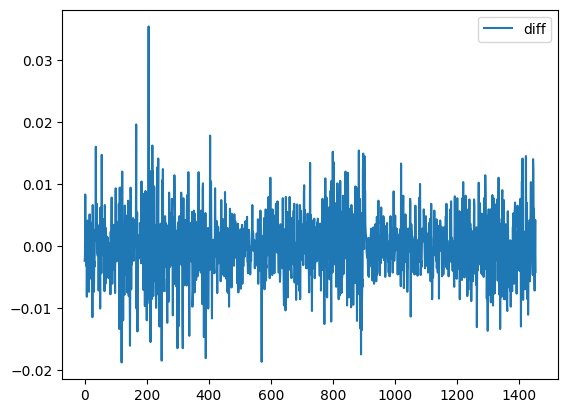

In [38]:
df_usd_euro_2['diff'] = df_usd_euro_2['USD'].diff(-1)
df_usd_euro_2.plot(y=['diff'])

<Axes: xlabel='date'>

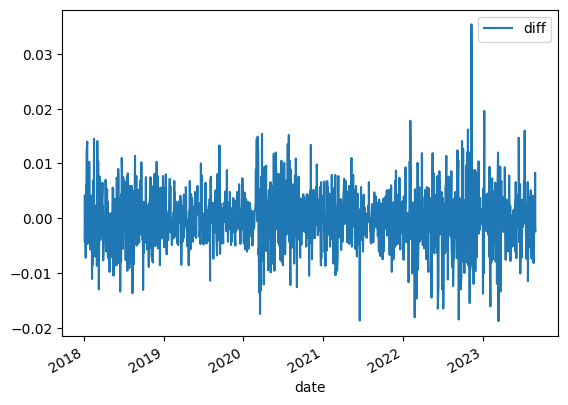

In [39]:
df_usd_euro_2.plot(x= 'date', y = ['diff'])

In [40]:
max_date = df_usd_euro_2['date'][df_usd_euro_2['diff'].idxmax()]
min_date = df_usd_euro_2['date'][df_usd_euro_2['diff'].idxmin()]

print("Date for Max Value:", max_date)
print("Date for Min Value:", min_date)

Date for Max Value: 2022-11-11 00:00:00
Date for Min Value: 2023-03-15 00:00:00


- Adding on a plot the min and max values representing the biggest depreciation and appreciation in one day 

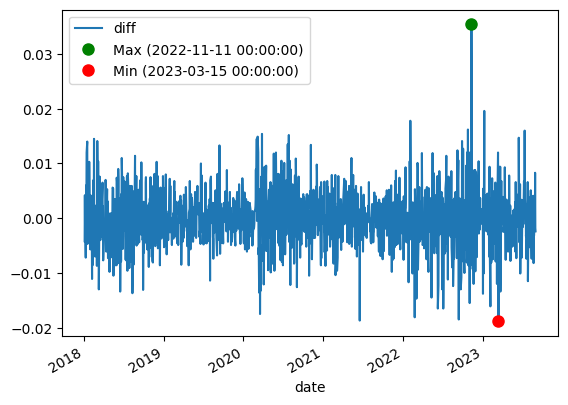

In [41]:

max_date = df_usd_euro_2['date'][df_usd_euro_2['diff'].idxmax()]
min_date = df_usd_euro_2['date'][df_usd_euro_2['diff'].idxmin()]

# Create the plot
ax = df_usd_euro_2.plot(x='date', y=['diff'], legend=False)

# Add markers for the max and min values
ax.plot(max_date, df_usd_euro_2['diff'].max(), marker='o', markersize=8, label=f'Max ({max_date})', linestyle='', color='green')
ax.plot(min_date, df_usd_euro_2['diff'].min(), marker='o', markersize=8, label=f'Min ({min_date})', linestyle='', color='red')

# Add legend
plt.legend()

# Show the plot
plt.show()
